In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel("Pruebita4 con mas variables Binario_2eq.xlsx")
df.sample(10)

,date,home_team,away_team,home_score,away_score,Competicion Valoracion,Condicion A,Condicion B,Resultado Home,Dif Goles Home,...,M a M Dif Gol Hist Home,M a M Dif Gol Hist Away,Perfor 5 Años Home,Perfor 5 Años Away,Perfor 10 Años Home,Perfor 10 Años Away,M a M Com > 5 Home,M a M Com > 5 Away,Perfor 10 Añ Comp>5 Home,Perfor 10 Añ Comp>5 Away
26043,2003-12-20,156,152,0,2,1,0,0,-1,-2,...,0,0,-7,7,-17,19,0,0,-8,5
10925,1979-11-01,179,217,1,0,1,1,-1,1,1,...,-1,1,4,1,18,-4,0,0,8,3
6702,1968-08-11,129,278,0,0,1,0,0,0,0,...,-2,2,-18,-12,-15,-20,0,0,-6,0
4769,1961-04-19,301,265,1,2,5,1,-1,-1,-1,...,0,0,1,8,-4,9,0,0,0,1
22092,1999-08-18,130,181,1,1,1,1,-1,0,0,...,0,0,-2,-17,-8,-18,0,0,-4,-8
3009,1950-07-13,270,296,2,3,7,0,0,-1,-1,...,0,0,14,0,20,4,0,0,2,9
38525,2017-03-23,70,42,1,0,5,1,-1,1,1,...,14,-14,18,-16,26,-37,5,-5,10,-28
35316,2013-09-06,147,100,2,1,5,1,-1,1,1,...,-2,2,-16,-23,-41,-50,0,0,-22,-22
7487,1970-11-11,265,202,3,0,3,1,-1,1,3,...,5,-5,3,-4,10,-11,0,0,4,2
38364,2016-11-13,142,268,1,0,1,1,-1,1,1,...,-2,2,-14,5,-3,9,0,0,-5,-2


In [3]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'Competicion Valoracion', 'Condicion A', 'Condicion B',
       'Resultado Home', 'Dif Goles Home', 'Resultado Away', 'Dif Goles Away ',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'Target Binario Equip A', 'Target Binario Equip B',
       'Dif Gol Acum a fecha Home', 'Dif Gol Acum a fecha Away',
       'Mano a Mano Histórico Home', 'Mano a Mano Histórico Away',
       'M a M = Cond 10 años Home', 'M a M = Cond 10 años Away',
       'M a M Dif Gol Hist Home', 'M a M Dif Gol Hist Away',
       'Perfor 5 Años Home', 'Perfor 5 Años Away', 'Perfor 10 Años Home',
       'Perfor 10 Años Away', 'M a M Com > 5 Home', 'M a M Com > 5 Away',
       'Perfor 10 Añ Comp>5 Home ', 'Perfor 10 Añ Comp>5 Away'],
      dtype='object')

In [4]:
df.columns = ['fecha', 'equipo_a', 'equipo_b', 'goles_a',
        'goles_b', 'valor_competicion', 'condicion_a', 'condicion_b',
       'resultado_a', 'diferencia_gol_a', 'resultado_b', 'diferencia_gol_b',
       'Dif Gol Acum Home', 'Dif Gol Acum Away', 'Performance Acum Home',
       'Performance Acum Away', 'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away', 'TargetA','TargetB','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']

In [5]:
df['año_home'] = df['Perf Home Año']**4
df['año_away'] = df['Perf Away Año']**4
df['5años_Home'] = df['Perfor 5 Años Home']**3
df['5años_Away'] = df['Perfor 5 Años Away']**3
df['10años_Home'] = df['Perfor 10 Años Home']**2
df['10años_Away'] = df['Perfor 10 Años Away']**2

In [6]:
train_cols = ['equipo_a', 'equipo_b','valor_competicion', 'condicion_a', 'condicion_b',
       'Perf Home Año', 'Perf Away Año',
       'Dif Gol Año Home', 'Dif Gol Año Away', 'Mano a Mano Home',
       'Mano a Mano Away','Dif Gol Acum a fecha Home',
       'Dif Gol Acum a fecha Away', 'Mano a Mano Histórico Home',
       'Mano a Mano Histórico Away', 'M a M = Cond 10 años Home',
       'M a M = Cond 10 años Away', 'M a M Dif Gol Hist Home',
       'M a M Dif Gol Hist Away', 'Perfor 5 Años Home', 'Perfor 5 Años Away',
       'Perfor 10 Años Home', 'Perfor 10 Años Away', 'M a M Com > 5 Home',
       'M a M Com > 5 Away', 'Perfor 10 Añ Comp>5 Home ',
       'Perfor 10 Añ Comp>5 Away']
X = df[train_cols]
y = df['TargetA']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [9]:
cv = KFold(n_splits=3, random_state=10, shuffle=True)

In [10]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [11]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced')
et = ExtraTreesClassifier(class_weight='balanced')


#evaluar_rendimiento(clf,  "Regresión Lógistica")
evaluar_rendimiento(clf,  "Regresion Logistica")
evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Regresion Logistica:	0.65 ± 0.008
Rendimiento de Árbol de decisión:	0.568 ± 0.006
Rendimiento de Bagging AD:	0.64 ± 0.01
Rendimiento de Random Forest:	0.658 ± 0.007
Rendimiento de Extra Trees:	0.66 ± 0.006


In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
KNC = KNeighborsClassifier()

evaluar_rendimiento(KNC,"KNeighbors")

Rendimiento de KNeighbors:	0.576 ± 0.01


## Random Forest 

In [27]:
rf = RandomForestClassifier(n_estimators = 1000,
            max_depth    = 15,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000, n_jobs=-1,
                       random_state=100)

In [28]:
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(recall_score(y_test,rf_pred))
print(precision_score(y_test,rf_pred))

0.675036496350365
0.6593059936908517
0.6677316293929713


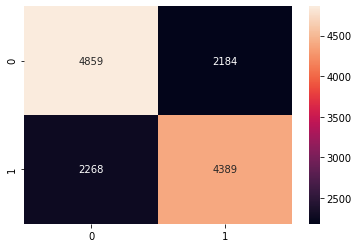

In [29]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rf_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

In [35]:
from sklearn.model_selection import RepeatedKFold

In [36]:
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9], 'n_estimators': [150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [37]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
6,10,5,150,-0.578832,0.006070,-0.485865,0.001825
7,10,7,150,-0.578961,0.005567,-0.479321,0.001840
8,10,9,150,-0.578968,0.005891,-0.474454,0.002001
0,None,5,150,-0.581245,0.006464,-0.037479,0.001883


In [38]:
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

{'max_depth': 10, 'max_features': 5, 'n_estimators': 150} : -0.5788319895778541 neg_root_mean_squared_error


In [39]:
rf_mejorado = RandomForestClassifier(n_estimators = 150,
            max_depth    = 10,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123)
rf_mejorado.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=150,
                       n_jobs=-1, random_state=123)

In [40]:
rf_pred_mj = rf_mejorado.predict(X_test)
print(accuracy_score(y_test,rf_pred_mj))
print(recall_score(y_test,rf_pred_mj))
print(precision_score(y_test,rf_pred_mj))

0.6742335766423357
0.6558509839266937
0.6677883144692567


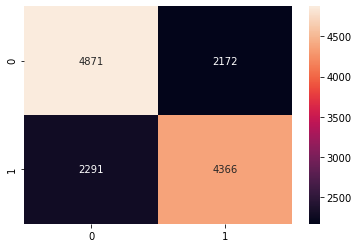

In [41]:
confusion = confusion_matrix(y_test, rf_pred_mj)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

## Bagging Classifier

In [42]:
bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [43]:
bdt_pred = bdt.predict(X_test)
print(accuracy_score(y_test,bdt_pred))

0.6299270072992701


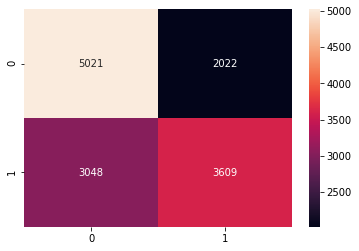

In [44]:
confusion = confusion_matrix(y_test, bdt_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [47]:
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
bdt_grid = GridSearchCV(estimator=bdt, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bdt_grid.fit(X = X_train, y = y_train)
best_params = bdt_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [49]:
final_dt = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=6)                   
final_bdt = BaggingClassifier(base_estimator=final_dt, n_estimators=40, random_state=1, oob_score=True)

final_bdt.fit(X = X_train, y = y_train)
final_preds = final_bdt.predict(X_test)
print(accuracy_score(y_test,final_preds))

0.6608029197080292


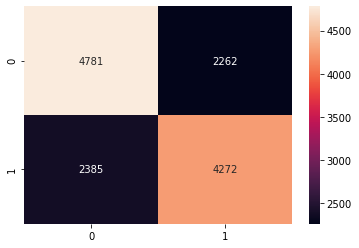

In [50]:
confusion = confusion_matrix(y_test, final_preds)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

## Regresión Logística

In [51]:
clf = LogisticRegression(C=1e10)
clf.fit(X_train,y_train)

LogisticRegression(C=10000000000.0)

In [52]:
clf_pred = clf.predict(X_test)
print(accuracy_score(y_test,clf_pred))

0.6565693430656935


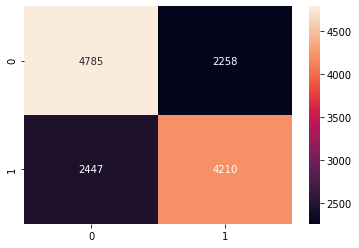

In [53]:
confusion = confusion_matrix(y_test, clf_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [55]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6561323875088506


In [56]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.6575182481751825


In [57]:
logreg2_preds = logreg2.predict(X_test)
print(accuracy_score(y_test,logreg2_preds))

0.6575182481751825


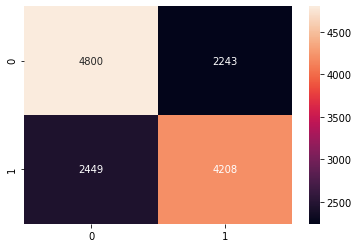

In [58]:
confusion = confusion_matrix(y_test, logreg2_preds)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

## Extra Trees

In [66]:
et = ExtraTreesClassifier(class_weight='balanced')
et.fit(X_train,y_train)
et_pred = et.predict(X_test)
print(accuracy_score(y_test,et_pred))

0.6677372262773723


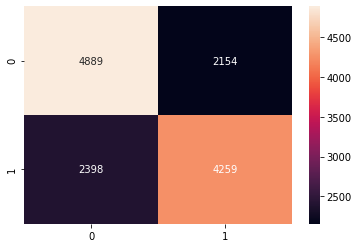

In [67]:
confusion = confusion_matrix(y_test, et_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [70]:
model = ExtraTreesClassifier(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=150)

In [88]:
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,300,50),
        'max_features': ["sqrt"],
        'min_samples_leaf': [15,30],
        'min_samples_split': [25,50,75,100],
    },
    scoring='r2',
    cv=5
)

In [89]:
grid_result = gsc.fit(X_train,y_train)

In [96]:
best_params_gsc = grid_result.best_params_
print(best_params_gsc)

{'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 50}


In [98]:
et_grid = ExtraTreesClassifier(n_estimators=50, n_jobs=4, min_samples_split=50,
                            min_samples_leaf=15, max_features='sqrt')
et_grid.fit(X_train,y_train)
et_grid_pred = et_grid.predict(X_test)
print(accuracy_score(y_test,et_grid_pred))

0.6717518248175183


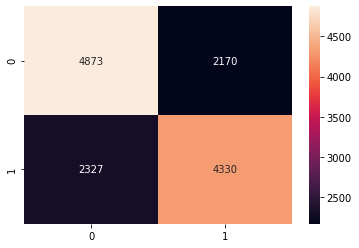

In [99]:
confusion = confusion_matrix(y_test, et_grid_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

## KNeighbors

In [102]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)
KNC_pred = KNC.predict(X_test)
print(accuracy_score(y_test,KNC_pred))

0.6101459854014598


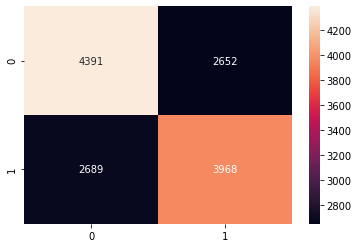

In [103]:
confusion = confusion_matrix(y_test,KNC_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [104]:
k_range = list(range(1, 100))

In [105]:
param_grid_KNC = dict(n_neighbors=k_range)
print(param_grid_KNC)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [107]:
grid_KNC = GridSearchCV(KNC, param_grid_KNC, cv=10, scoring='accuracy')

In [108]:
grid_KNC.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [109]:
grid_KNC.best_estimator_, grid_KNC.best_score_, grid_KNC.best_params_

(KNeighborsClassifier(n_neighbors=75), 0.6294895706745811, {'n_neighbors': 75})

In [110]:
knn_gd = KNeighborsClassifier(n_neighbors=75)
knn_gd.fit(X_train, y_train)
knn_gd_pred = knn_gd.predict(X_test)

In [112]:
print(accuracy_score(y_test,knn_gd_pred))

0.6317518248175182


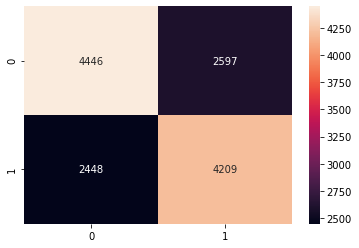

In [113]:
confusion = confusion_matrix(y_test,knn_gd_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()